# **머신러닝 기반 문제 해결 과정**

## 1. 문제 정의하기



 붓꽃의 꽃받침, 꽃잎 길이와 너비를 이용해 붓꽃을 분류할 수 있을까요? 붓꽃의 꽃받침, 꽃잎 길이와 너비를 기반으로 품종을 분류하는 문제를 정의합니다.

 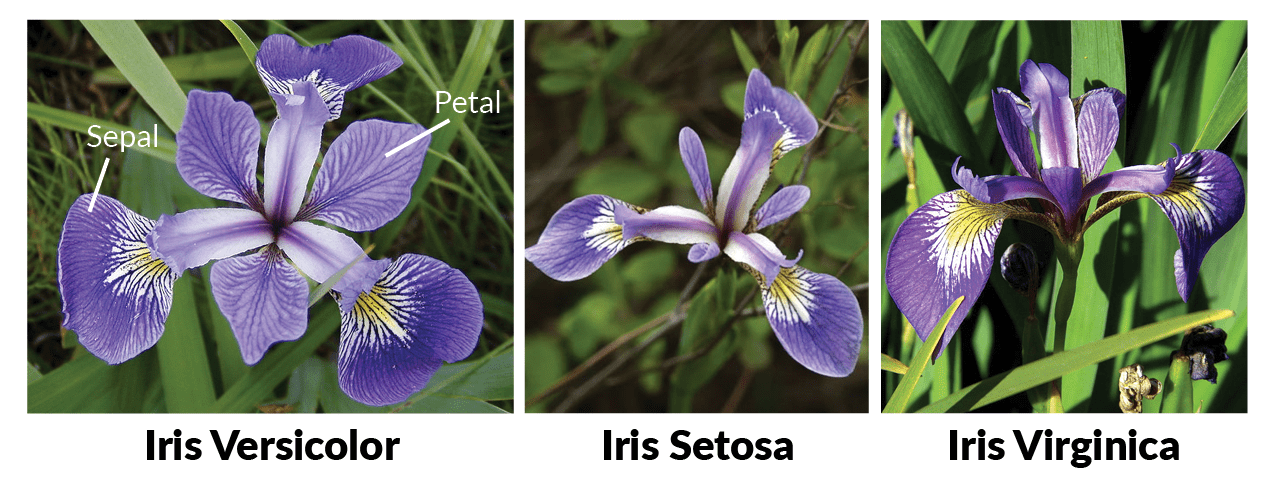

 이미지 출처: http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html

## 2. 데이터 수집하기


데이터는 직접 수집할 수도 있고 데이터 수집 사이트에서 수집할 수 있습니다. 붓꽃 데이터는 사이킷런 라이브러리에 내장되어 있습니다. 이 데이터셋은 붓꽃의 꽃받침과 꽃잎의 길이와 너비, 그리고 품종에 대한 정보를 포함하고 있습니다.
- 품종(target) : 0(Iris Setosa), 1(Iris Versicolor), 2(Iris Virginica)

## 3. 탐색적 데이터 분석과 전처리하기

In [1]:
# scikit-learn 라이브러리에서 붓꽃(iris) 데이터셋을 불러옵니다.
from sklearn.datasets import load_iris
# 붓꽃 데이터셋을 로드합니다.
iris = load_iris()
# 데이터셋을 특징(X)과 타겟(y)으로 분할합니다.
# X는 붓꽃의 측정값(꽃받침 길이/너비, 꽃잎 길이/너비)이고,
# y는 각 측정값에 해당하는 붓꽃의 품종(0, 1, 2)입니다.
X, y = iris.data, iris.target
#print(iris) # 특징(X), 타깃(y)으로 데이터 분할

In [2]:
# scikit-learn의 model_selection 모듈에서 데이터 분할 함수를 불러옵니다.
from sklearn.model_selection import train_test_split
# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
# X: 특징 데이터, y: 타겟 데이터
# test_size=0.3: 테스트 세트의 비율을 전체 데이터의 30%로 설정합니다.
# random_state=42: 데이터를 무작위로 분할할 때 사용되는 시드값으로, 결과를 일관되게 유지합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. 모델 생성하기

In [3]:
# scikit-learn의 tree 모듈에서 결정 트리 분류기를 불러옵니다.
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 모델 객체를 생성합니다.
# 의사결정트리 모델 생성 및 학습
model = DecisionTreeClassifier()
# 훈련 데이터(X_train, y_train)를 사용하여 모델을 학습시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 5. 모델 평가 및 예측하기

In [4]:
# scikit-learn의 metrics 모듈에서 정확도 계산 함수를 불러옵니다.
from sklearn.metrics import accuracy_score
# 학습된 모델을 사용하여 테스트 데이터(X_test)에 대한 예측값을 계산합니다.
y_pred = model.predict(X_test)  # 테스트 데이터를 사용하여 모델의 예측값을 계산

# 실제 타겟값(y_test)과 모델의 예측값(y_pred)을 비교하여 정확도를 계산하고 출력합니다.
# 실제값과 예측값을 비교하여 정확도 계산
print("정확도: ", accuracy_score(y_test, y_pred))

정확도:  1.0


## 6. 모델 활용하기

In [5]:
# numpy 라이브러리를 불러옵니다. 수치 계산에 사용됩니다.
import numpy as np

# 새로운 붓꽃 테스트 데이터 3개를 numpy 배열로 생성합니다.
# 각 행은 하나의 붓꽃 샘플이며, 열은 특징(꽃받침 길이/너비, 꽃잎 길이/너비)입니다.
# 붓꽃 테스트 데이터 3개 생성
test_data = np.array([[5.0, 3.6, 1.3, 0.25],
                      [6.7, 3.0, 5.0, 1.7],
                      [5.8, 2.7, 5.1, 1.9]])

# 학습된 모델을 사용하여 새로운 테스트 데이터에 대한 품종을 예측합니다.
# 예측
predictions = model.predict(test_data)
# 예측 결과를 출력합니다. 결과는 0, 1, 2 중 하나로 나타납니다.
print(predictions)

[0 1 2]


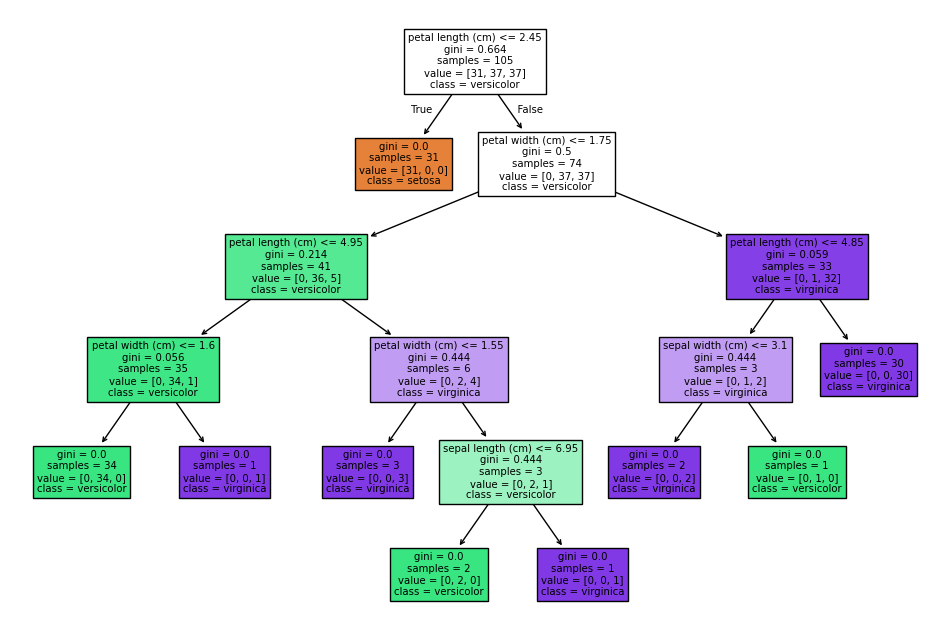

In [6]:
# scikit-learn의 tree 모듈을 불러옵니다. 결정 트리 시각화에 사용됩니다.
from sklearn import tree
# matplotlib.pyplot을 불러옵니다. 그래프를 그리는 데 사용됩니다.
import matplotlib.pyplot as plt

# 결정 트리를 시각화합니다.
plt.figure(figsize=(12,8)) # 그래프의 크기를 설정합니다.
# tree.plot_tree 함수를 사용하여 결정 트리를 그립니다.
# model: 시각화할 결정 트리 모델 객체
# feature_names: 특징(feature)의 이름을 지정합니다. (예: 'sepal length (cm)')
# class_names: 타겟(class)의 이름을 지정합니다. (예: 'setosa', 'versicolor', 'virginica')
# filled=True: 노드(node)를 색깔로 채워 클래스를 구분합니다.
tree.plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
# 시각화된 트리를 화면에 표시합니다.
plt.show()

### 의미 해석

0: Iris Setosa
1: Iris Versicolor
2: Iris Virginica

# 심화과정 실습
## 위키북스 활용해 보자

[링크 텍스트](https://wikidocs.net/263123)

In [7]:
# scikit-learn에서 붓꽃 데이터셋을 로드하는 함수를 불러옵니다.
from sklearn.datasets import load_iris
# pandas 라이브러리를 불러옵니다. 데이터프레임을 다루는 데 사용됩니다.
import pandas as pd

# 붓꽃 데이터셋 로드
iris = load_iris()

# 붓꽃 데이터를 pandas DataFrame으로 변환합니다.
# iris.data: 특징 데이터
# columns=iris.feature_names: 특징 데이터의 열 이름을 지정합니다.
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# 타겟 데이터(품종)를 'species'라는 새로운 열로 DataFrame에 추가합니다.
iris_df['species'] = iris.target

# DataFrame의 기본 통계량(개수, 평균, 표준편차, 최소/최대값, 사분위수)을 계산하고 출력합니다.
# 기본 통계량 확인
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 결과 설명:
- count: 각 특성의 데이터 개수 (150개의 관측값).
- mean: 각 특성의 평균값.
- std: 표준편차로, 데이터의 퍼짐 정도를 나타냅니다.
- min: 각 특성의 최솟값.
- 25%, 50%, 75%: 각각 1사분위수, 중앙값(2사분위수), - 3사분위수를 나타내며, 데이터 분포를 이해하는 데 유용합니다.
- max: 각 특성의 최댓값.

이 결과를 통해 붓꽃 데이터셋의 각 특성이 어떻게 분포되어 있는지, 각 품종별 특성이 어떤 차이를 보일지 미리 예상할 수 있습니다.

### 데이터 가시화
이 단계에서는 데이터 가시화를 통해 붓꽃 데이터셋의 각 특성 간의 상관관계를 시각적으로 확인합니다.
가시화는 데이터 탐색과 이해를 돕는 중요한 도구로, 변수 간의 관계와 데이터의 분포를 직관적으로 파악할 수 있습니다. 특히 붓꽃 데이터의 경우, 품종별로 데이터가 어떻게 분포하는지 확인하는 것이 중요합니다.

예시 프롬프트:
"붓꽃 데이터셋에서 특성 간의 상관관계를 가시화해 줘."

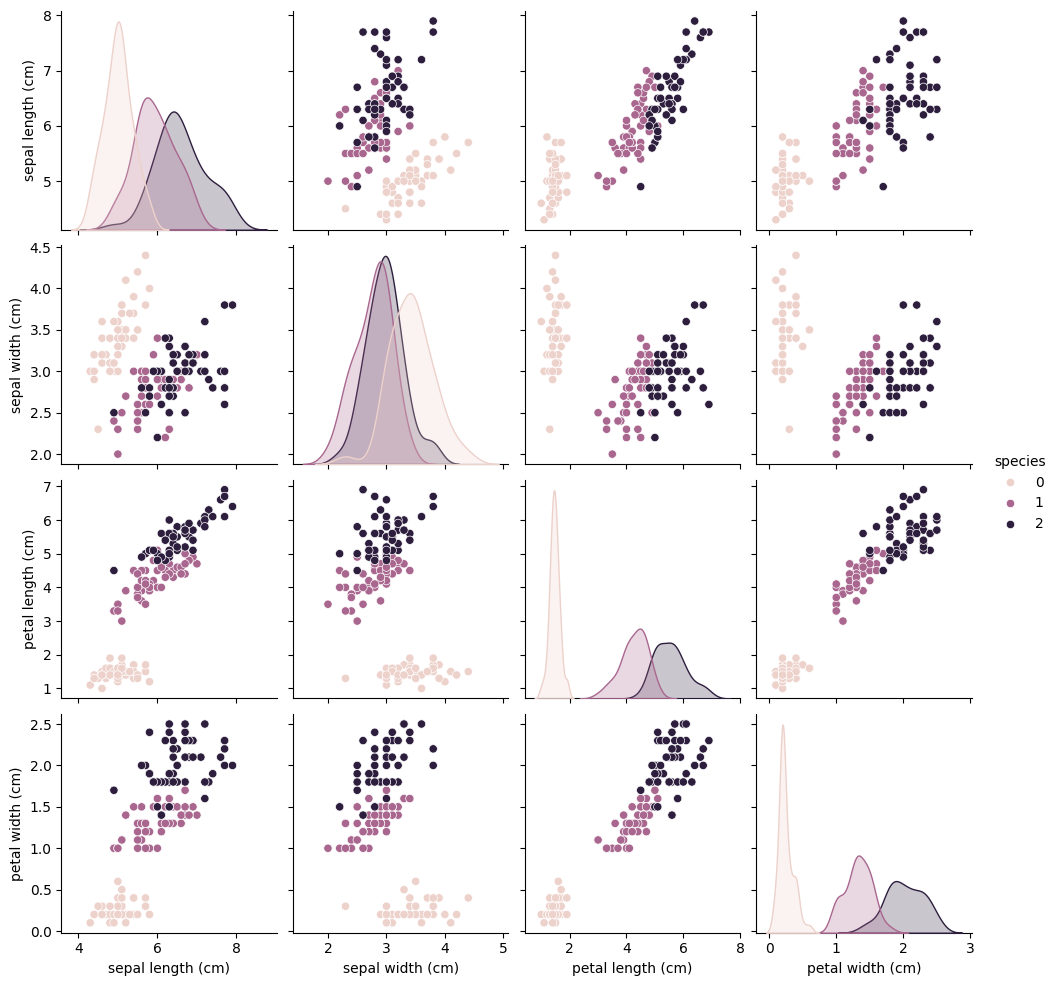

In [8]:
# seaborn 라이브러리를 불러옵니다. 통계 데이터 시각화에 사용됩니다.
import seaborn as sns
# matplotlib.pyplot을 불러옵니다. 그래프를 그리는 데 사용됩니다.
import matplotlib.pyplot as plt

# 데이터프레임의 각 특성 간의 산점도(Scatter Plot)와 히스토그램을 한 화면에 그립니다.
# sns.pairplot: 데이터프레임의 각 숫자형 열 쌍에 대한 산점도를 그리는 함수입니다.
# hue='species': 'species' 열의 값에 따라 다른 색상으로 점을 표시하여 품종별 구분을 시각화합니다.
# 특성 간의 상관관계 가시화, hue='species'는 각 품종별로 데이터를 색깔로 구분하여 시각화
sns.pairplot(iris_df, hue='species')
# 생성된 그래프를 화면에 표시합니다.
plt.show()

### 위 그래프 해석
- 특성 간의 관계: 예를 들어, 꽃잎 길이와 꽃잎 너비는 세 가지 품종에서 뚜렷한 차이를 보이며, 상관관계가 강하게 나타납니다.
- 품종별 데이터 분포: Iris-setosa, Iris-versicolor, Iris-virginica 세 가지 품종의 데이터가 다른 패턴으로 분포하는 것을 시각적으로 확인할 수 있습니다.
- 변수의 분포: 각 변수(꽃받침 길이, 너비, 꽃잎 길이, 너비)의 데이터 분포가 히스토그램으로 표시되며, 변수들이 어느 값에 집중되어 있는지 파악할 수 있습니다.

### 데이터셋 분할
모델을 훈련하기 위해 붓꽃 데이터셋을 훈련 데이터와 평가용 데이터로 나누는 과정입니다. 이때, 데이터셋의 80%는 훈련 데이터로 사용되고, 나머지 20%는 평가용 데이터로 분할됩니다. 이 작업을 통해 모델을 학습시킬 데이터를 확보하고, 학습된 모델을 테스트할 수 있습니다.

- 예시 프롬프트:
"붓꽃 데이터셋을 훈련 데이터와 평가용 데이터로 8:2 비율로 분할해 줘."

In [9]:
# scikit-learn의 model_selection 모듈에서 데이터 분할 함수를 불러옵니다.
from sklearn.model_selection import train_test_split

# 붓꽃 데이터셋에서 목표 변수(species)를 제외한 나머지 특성(꽃받침 길이, 너비, 꽃잎 길이, 너비)을 특성 변수(X)로 설정합니다.
# 목표 변수(y)는 붓꽃의 품종(species)을 나타냅니다.
# 붓꽃 데이터셋에서 목표 변수(species)를 제외한 나머지 특성(꽃받침 길이, 너비, 꽃잎 길이, 너비)을 특성 변수(X)로 설정
# 목표 변수(y)는 붓꽃의 품종(species)을 나타냄

# 특성(X)과 타겟(y) 설정
# iris_df.drop('species', axis=1): 'species' 열을 제외한 나머지 열을 선택하여 X로 설정합니다. axis=1은 열을 의미합니다.
X = iris_df.drop('species', axis=1)  # 'species' 열을 제외한 나머지 특성들
# iris_df['species']: 'species' 열을 선택하여 y로 설정합니다.
y = iris_df['species']  # 'species' 열을 목표 변수로 설정

# 훈련 데이터와 평가용 데이터로 데이터를 분할합니다.
# X, y: 분할할 전체 특징 및 타겟 데이터
# test_size=0.2: 테스트 세트의 비율을 전체 데이터의 20%로 설정합니다.
# random_state=42: 데이터 분할의 무작위성을 고정하여 재현 가능하게 합니다.
# 훈련 데이터와 평가용 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 읽을 거리
##### random_state=42 왜 42인지 설명
random_state=42에서 random_state는 데이터를 무작위로 분할할 때 사용되는 "시드(seed)" 값입니다. 이 값을 지정하면 데이터를 분할할 때마다 동일한 방식으로 무작위 분할이 이루어지도록 보장합니다.

* 왜 42를 사용할까요?

사실 random_state에 어떤 숫자를 사용해도 상관없습니다. 0, 1, 100 등 어떤 정수든 가능합니다. 중요한 것은 동일한 결과를 재현하기 위해 같은 숫자를 사용한다는 것입니다.

42가 자주 사용되는 이유는 특별한 의미가 있어서라기보다는 관습적인 측면이 강합니다. 유명한 공상과학 소설 "은하수를 여행하는 히치하이커를 위한 안내서"에서 "삶, 우주, 그리고 모든 것에 대한 궁극적인 질문에 대한 해답"이 42라는 내용이 나옵니다. 이 때문에 많은 프로그래머들이 이 숫자를 재미 삼아 또는 관례적으로 사용하게 되었습니다.

결론적으로 random_state=42는 코드 실행 시 데이터 분할 결과가 항상 동일하도록 만들어 재현성을 확보하기 위한 것이며, 숫자 42 자체에 특별한 의미는 없습니다.

### 모델 훈련
이 단계에서는 결정 트리(Decision Tree: 의사결정 나무, 결정 나무) 알고리즘을 사용하여 붓꽃 품종을 분류하는 모델을 훈련시킵니다. 결정 트리는 분류 작업에서 자주 사용되는 간단하고 직관적인 알고리즘으로, 데이터의 특성을 기준으로 여러 단계에 걸쳐 분류를 진행하는 구조입니다.

* 예시 프롬프트:
"결정 트리 모델을 사용해 붓꽃 데이터셋을 학습시켜 줘."

In [10]:
# scikit-learn의 tree 모듈에서 결정 트리 분류기를 불러옵니다.
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 모델 객체를 생성합니다.
# 결정 트리 모델 생성 및 훈련
# DecisionTreeClassifier(random_state=42): 결정 트리 분류기 객체를 생성합니다.
# random_state=42: 모델 학습 과정의 무작위성을 고정하여 결과를 일관되게 합니다.
model = DecisionTreeClassifier(random_state=42)  # random_state 설정으로 결과 일관성 유지
# 훈련 데이터(X_train, y_train)를 사용하여 결정 트리 모델을 학습시킵니다.
model.fit(X_train, y_train)  # 훈련 데이터로 모델 학습

DecisionTreeClassifier(random_state=42)

### 모델 평가
훈련된 결정 트리 모델을 사용하여 평가용 데이터에 대해 예측을 수행하고, 모델의 성능을 평가합니다. 성능 평가에서 가장 기본적인 지표 중 하나인 정확도(Accuracy)를 사용하여 모델이 얼마나 잘 분류하는지 확인합니다.

예시 프롬프트:
"평가용 데이터에 대한 예측을 수행하고, 모델의 정확도를 계산해 줘."

In [11]:
# scikit-learn의 metrics 모듈에서 정확도 계산 함수를 불러옵니다.
from sklearn.metrics import accuracy_score

# 학습된 모델을 사용하여 평가용 데이터(X_test)에 대한 품종을 예측합니다.
# 평가용 데이터에 대한 예측
y_pred = model.predict(X_test)

# 실제 평가용 데이터의 타겟값(y_test)과 모델의 예측값(y_pred)을 비교하여 정확도를 계산합니다.
# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
# 계산된 정확도를 출력합니다.
accuracy

1.0